In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
from colorspacious import cspace_converter
from collections import OrderedDict

In [3]:
import seaborn as sns

cmaps = OrderedDict()

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('D:/PROJECT/hotel_reviews.csv')
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [5]:
df.shape

(20491, 2)

In [6]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [7]:
df.dtypes

Review    object
Rating     int64
dtype: object

In [8]:
df.duplicated().sum()

0

In [9]:
# drop duplicated rows
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated(subset=['Review']).sum()

0

In [11]:
df.Rating.unique()

array([4, 2, 3, 5, 1], dtype=int64)

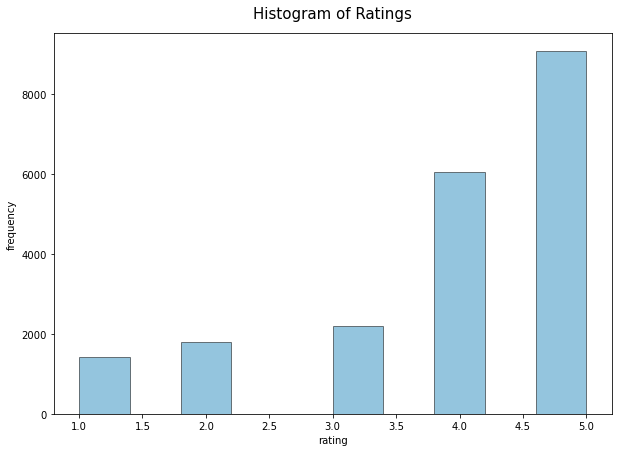

In [12]:
num_bins = 10

fig, ax = plt.subplots(figsize = (10,7))

n, bins, patches = ax.hist(df['Rating'], num_bins, facecolor='#2b8cbe', alpha=0.5, edgecolor='#000000', linewidth=1)

ax.set_title('Histogram of Ratings', fontsize = 15, pad=15)
ax.set_xlabel('rating')
ax.set_ylabel('frequency')

plt.show()

In [13]:
# filter out values over 5

df = df.loc[(df['Rating'] > 0) & (df['Rating'] <= 5.0)]

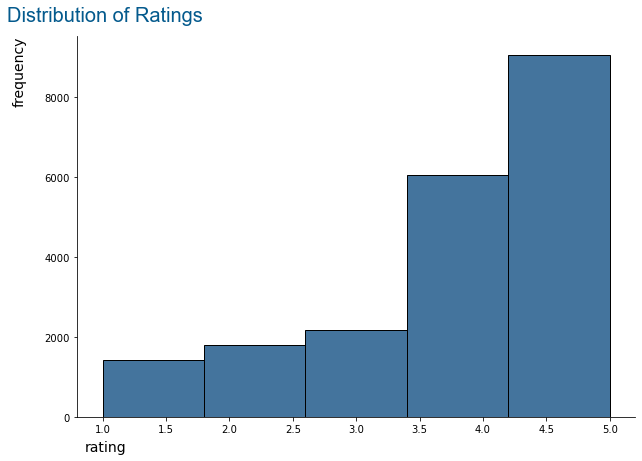

In [14]:
num_bins = 5

font = {'family': 'Arial',
       'color': '#045a8d',
       'size': 20}

fig, ax = plt.subplots(figsize = (10,7))

n, bins, patches = ax.hist(df['Rating'], num_bins, facecolor='#44749D', edgecolor='#000000', linewidth=1)

ax.set_title('Distribution of Ratings', fontdict = font, pad=15)
ax.set_xlabel('rating', fontsize = 14)
ax.set_ylabel('frequency', fontsize = 14)

ax.title.set_position([.05, 0])
ax.yaxis.set_label_coords(-.09,.91)
ax.xaxis.set_label_coords(.05, -.06)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.show()

In [15]:
# filter reviews that are only in the english language
df = df[df['Review'].str.contains('en')]
df.head(3)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3


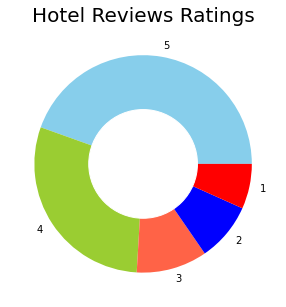

In [16]:
ratings = df["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Hotel Reviews Ratings", fontsize=20)
plt.show()

In [17]:
df = df.reset_index()

# Create Pos/Neg/Neutral Column

negative: 0-2 rating

neutral: 3 rating

postivie: 4-5 rating

In [18]:
# bin the data into negative, neutral, and positive values
bins = [0, 2, 4, 6]

bin_names = ['negative', 'neutral', 'positive']

score_bin = pd.Series(df.Rating, name = 'score')

score = pd.cut(score_bin, bins, labels=bin_names, right=False)

In [19]:
# number of counts per score

pd.value_counts(score)

positive    14553
neutral      3782
negative     1315
Name: score, dtype: int64

In [20]:
# add the bins into the dataframe

df = pd.concat([df, score], axis=1)

df.head(2)

,index,Review,Rating,score
0,0,nice hotel expensive parking got good deal sta...,4,positive
1,1,ok nothing special charge diamond member hilto...,2,neutral


# Word Counts

In [21]:
counts_df = df[['score', 'Review']]

In [22]:
# number of words in the review
counts_df.loc[:,'word_count'] = counts_df.loc[:,'Review'].apply(lambda x: len(str(x).split(" ")))

In [23]:
# number of characters in the review
counts_df.loc[:,'char_count'] = counts_df.loc[:,'Review'].str.len()

In [24]:
counts_df.head()

,score,Review,word_count,char_count
0,positive,nice hotel expensive parking got good deal sta...,89,593
1,neutral,ok nothing special charge diamond member hilto...,252,1689
2,neutral,nice rooms not 4* experience hotel monaco seat...,219,1427
3,positive,"unique, great stay, wonderful time hotel monac...",91,600
4,positive,"great stay great stay, went seahawk game aweso...",193,1281


In [25]:
counts_df.describe()

,word_count,char_count
count,19650.000000,19650.000000
mean,109.311094,745.505751
std,101.685233,695.812888
min,11.000000,55.000000
25%,53.000000,357.000000
50%,81.000000,555.000000
75%,129.000000,881.000000
max,1933.000000,13501.000000


In [26]:
# separate by positive and negative reviews
counts_pos = counts_df.loc[(counts_df['score']=='positive')]

counts_neg = counts_df.loc[(counts_df['score']=='negative')]

In [27]:
counts_pos.describe()

,word_count,char_count
count,14553.000000,14553.000000
mean,103.922009,712.282828
std,98.894405,677.051292
min,11.000000,61.000000
25%,50.000000,341.000000
50%,77.000000,527.000000
75%,122.000000,841.000000
max,1757.000000,12738.000000


In [28]:
counts_neg.describe()

,word_count,char_count
count,1315.000000,1315.000000
mean,120.438783,811.730038
std,101.263148,696.469103
min,14.000000,89.000000
25%,60.000000,392.000000
50%,90.000000,605.000000
75%,148.000000,1001.000000
max,956.000000,6511.000000


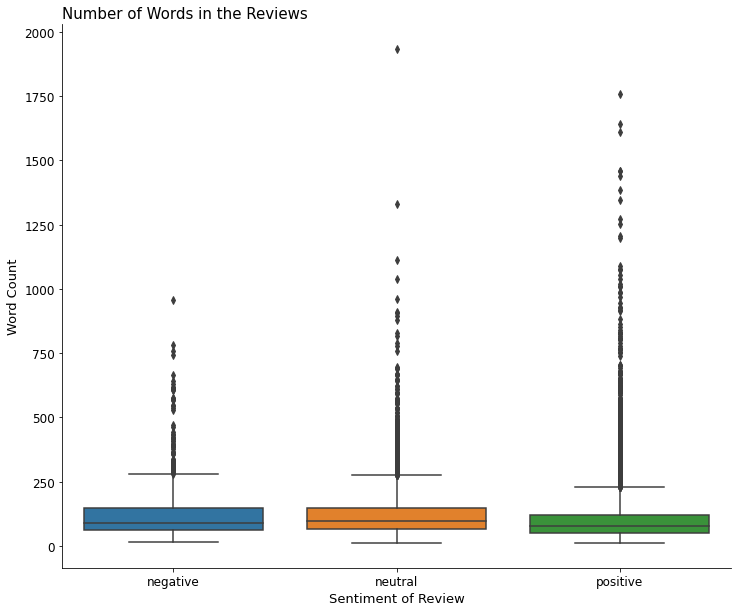

In [29]:
# create figure
fig, ax = plt.subplots(figsize = (12,10))

sns.boxplot(x=counts_df['score'], y=counts_df['word_count'])

# title
ax.set_title('Number of Words in the Reviews', fontsize = 15, loc = 'left')

# set x axis label
ax.set_xlabel('Sentiment of Review', fontsize = 13)

# set y axis label
ax.set_ylabel('Word Count', fontsize = 13)

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.show()

# Final Shape

In [30]:
print('There are {} total number of reviews to find insights from.'.format(df.shape[0]))

There are 19650 total number of reviews to find insights from.


In [31]:
# export cleaned df
df.to_csv('hotel_reviews.csv', index=False)

# Text Pre-Processing

Important Libraries

In [32]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [33]:
from textblob import TextBlob
from spellchecker import SpellChecker
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS

In [34]:
from collections import Counter

In [35]:
df1 = pd.read_csv('hotel_reviews.csv')
df1

,index,Review,Rating,score
0,0,nice hotel expensive parking got good deal sta...,4,positive
1,1,ok nothing special charge diamond member hilto...,2,neutral
2,2,nice rooms not 4* experience hotel monaco seat...,3,neutral
3,3,"unique, great stay, wonderful time hotel monac...",5,positive
4,4,"great stay great stay, went seahawk game aweso...",5,positive
...,...,...,...,...
19645,20486,"best kept secret 3rd time staying charm, not 5...",5,positive
19646,20487,great location price view hotel great quick pl...,4,positive
19647,20488,"ok just looks nice modern outside, desk staff ...",2,neutral
19648,20489,hotel theft ruined vacation hotel opened sept ...,1,negative


In [36]:
df1.shape

(19650, 4)

In [37]:
# select only the rating score and text columns

df = df1[['score', 'Review']]
df.head(2)

,score,Review
0,positive,nice hotel expensive parking got good deal sta...
1,neutral,ok nothing special charge diamond member hilto...


In [38]:
# create copy of original text column
df.loc[:,'Review_cln'] = df['Review']
df

,score,Review,Review_cln
0,positive,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
1,neutral,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,neutral,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...
3,positive,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac..."
4,positive,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso..."
...,...,...,...
19645,positive,"best kept secret 3rd time staying charm, not 5...","best kept secret 3rd time staying charm, not 5..."
19646,positive,great location price view hotel great quick pl...,great location price view hotel great quick pl...
19647,neutral,"ok just looks nice modern outside, desk staff ...","ok just looks nice modern outside, desk staff ..."
19648,negative,hotel theft ruined vacation hotel opened sept ...,hotel theft ruined vacation hotel opened sept ...


In [39]:
df.shape

(19650, 3)

# Text Pre-Processing

# Make Text Lower Case

Make text lower case so words with mixed cases are treated as the same word and not two separate words.

In [40]:
df.loc[:,'Review_cln'] = df.loc[:,'Review_cln'].str.lower()

In [41]:
df['Review_cln'].head(20)

0     nice hotel expensive parking got good deal sta...
1     ok nothing special charge diamond member hilto...
2     nice rooms not 4* experience hotel monaco seat...
3     unique, great stay, wonderful time hotel monac...
4     great stay great stay, went seahawk game aweso...
5     love monaco staff husband stayed hotel crazy w...
6     cozy stay rainy city, husband spent 7 nights m...
7     excellent staff, housekeeping quality hotel ch...
8     hotel stayed hotel monaco cruise, rooms genero...
9     excellent stayed hotel monaco past w/e delight...
10    poor value stayed monaco seattle july, nice ho...
11    nice hotel good location hotel kimpton design ...
12    nice hotel not nice staff hotel lovely staff q...
13    great hotel night quick business trip, loved l...
14    horrible customer service hotel stay february ...
15    disappointed say anticipating stay hotel monac...
16    fantastic stay monaco seattle hotel monaco hol...
17    good choice hotel recommended sister, grea

# Remove Punctuations

In [42]:
df.loc[:,'Review_cln'] = df.loc[:,'Review_cln'].str.replace('[^\w\s]',' ')
df['Review_cln'].head(20)

0     nice hotel expensive parking got good deal sta...
1     ok nothing special charge diamond member hilto...
2     nice rooms not 4  experience hotel monaco seat...
3     unique  great stay  wonderful time hotel monac...
4     great stay great stay  went seahawk game aweso...
5     love monaco staff husband stayed hotel crazy w...
6     cozy stay rainy city  husband spent 7 nights m...
7     excellent staff  housekeeping quality hotel ch...
8     hotel stayed hotel monaco cruise  rooms genero...
9     excellent stayed hotel monaco past w e delight...
10    poor value stayed monaco seattle july  nice ho...
11    nice hotel good location hotel kimpton design ...
12    nice hotel not nice staff hotel lovely staff q...
13    great hotel night quick business trip  loved l...
14    horrible customer service hotel stay february ...
15    disappointed say anticipating stay hotel monac...
16    fantastic stay monaco seattle hotel monaco hol...
17    good choice hotel recommended sister  grea

# Remove Numbers & Strip Whitespace

In [43]:
def remove_numbers(Review):
    """Function to remove numbers and whitespace."""
    
    # remove numbers
    pattern = r'[^a-zA-z\s*|\s\\s]' 
    Review2 = re.sub(pattern, '', Review)
    
    # remove white space where number was at
    pattern2 = r'^\s*|\s\s*'
    return re.sub(pattern2, ' ', Review2).strip()

In [44]:
df.loc[:,'Review_cln'] = df.loc[:,'Review_cln'].apply(lambda x: str(remove_numbers(x)))
df['Review_cln'].head(20)

0     nice hotel expensive parking got good deal sta...
1     ok nothing special charge diamond member hilto...
2     nice rooms not experience hotel monaco seattle...
3     unique great stay wonderful time hotel monaco ...
4     great stay great stay went seahawk game awesom...
5     love monaco staff husband stayed hotel crazy w...
6     cozy stay rainy city husband spent nights mona...
7     excellent staff housekeeping quality hotel cho...
8     hotel stayed hotel monaco cruise rooms generou...
9     excellent stayed hotel monaco past w e delight...
10    poor value stayed monaco seattle july nice hot...
11    nice hotel good location hotel kimpton design ...
12    nice hotel not nice staff hotel lovely staff q...
13    great hotel night quick business trip loved li...
14    horrible customer service hotel stay february ...
15    disappointed say anticipating stay hotel monac...
16    fantastic stay monaco seattle hotel monaco hol...
17    good choice hotel recommended sister great

# Spell Check Words

Make sure all misspelled words are treated as the correct spelled word.

In [45]:
spell = SpellChecker()

In [46]:
df.loc[:,'Review_cln'] = df.loc[:,'Review_cln'].apply(lambda x: str(spell.correction(x)))
df

,score,Review,Review_cln
0,positive,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
1,neutral,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,neutral,nice rooms not 4* experience hotel monaco seat...,nice rooms not experience hotel monaco seattle...
3,positive,"unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...
4,positive,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...
...,...,...,...
19645,positive,"best kept secret 3rd time staying charm, not 5...",best kept secret rd time staying charm not sta...
19646,positive,great location price view hotel great quick pl...,great location price view hotel great quick pl...
19647,neutral,"ok just looks nice modern outside, desk staff ...",ok just looks nice modern outside desk staff n...
19648,negative,hotel theft ruined vacation hotel opened sept ...,hotel theft ruined vacation hotel opened sept ...


# Normalization - Lemmatization

Lemmatization converts word to base form based off of context. It is more accurate than stemming.

In [47]:
lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
# part of speach tag
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV} 

def lemmatize_words(Review):
    """Function for lemmatization using part of speach tag"""
    pos_tagged_Review = nltk.pos_tag(Review.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) 
                     for word, pos in pos_tagged_Review])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91733\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91733\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91733\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [48]:
df.loc[:,'Review_cln'] = df.loc[:,'Review_cln'].apply(lambda x: str(lemmatize_words(x)))
df['Review_cln'].head(20)

0     nice hotel expensive parking get good deal sta...
1     ok nothing special charge diamond member hilto...
2     nice room not experience hotel monaco seattle ...
3     unique great stay wonderful time hotel monaco ...
4     great stay great stay go seahawk game awesome ...
5     love monaco staff husband stay hotel crazy wee...
6     cozy stay rainy city husband spend night monac...
7     excellent staff housekeep quality hotel chock ...
8     hotel stay hotel monaco cruise room generous d...
9     excellent stay hotel monaco past w e delight r...
10    poor value stay monaco seattle july nice hotel...
11    nice hotel good location hotel kimpton design ...
12    nice hotel not nice staff hotel lovely staff q...
13    great hotel night quick business trip love lit...
14    horrible customer service hotel stay february ...
15    disappointed say anticipate stay hotel monaco ...
16    fantastic stay monaco seattle hotel monaco hol...
17    good choice hotel recommend sister great l

# Store Text as is for R Analysis

Store the text as is for R analyais before removing stop words.

In [49]:
cln_full_sentence = pd.Series(df['Review_cln'], name='cln_full_sentence')

# Remove Stop Words

Remove words such as "the," "a," "and," "it," "is"

In [50]:
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

def stopwords(Review):
    """Function to remove stopwords"""
    return " ".join([word for word in str(Review).split() if word not in STOPWORDS])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91733\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
# remove stopwrds
df.loc[:,'Review_cln'] = df.loc[:,'Review_cln'].apply(lambda x: str(stopwords(x)))

In [52]:
df['Review_cln'].head(10)

0    nice hotel expensive parking get good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice room experience hotel monaco seattle good...
3    unique great stay wonderful time hotel monaco ...
4    great stay great stay go seahawk game awesome ...
5    love monaco staff husband stay hotel crazy wee...
6    cozy stay rainy city husband spend night monac...
7    excellent staff housekeep quality hotel chock ...
8    hotel stay hotel monaco cruise room generous d...
9    excellent stay hotel monaco past w e delight r...
Name: Review_cln, dtype: object

# Rare Words

List of 100 rare words in the reviews. These are words that are most likely unique to an individual review and would not occur requently. They will be removed from the text.

In [53]:
freq = pd.Series(' '.join(df['Review_cln']).split()).value_counts()[-100:] # 100 rare words
freq = list(freq.index)

In [54]:
freq

['orelans',
 'upsholstery',
 'unclogging',
 'unfort',
 'cultery',
 'piper',
 'deisel',
 'overfull',
 'bedspead',
 'yukky',
 'roundtree',
 'possibiltity',
 'lumberyard',
 'confronted',
 'roundhouse',
 'tha_kfully',
 'getfresh',
 'reconditionning',
 'nicepart',
 'impersonnal',
 'undertand',
 'maree',
 'refridgerater',
 'bernadins',
 'mastering',
 'morrisey',
 'imp',
 'hitchy',
 'mng',
 'decree',
 'governance',
 'developmentally',
 'manhattn',
 'negatie',
 'libery',
 'littled',
 'greenich',
 'stunned',
 'bellservice',
 'blubber',
 'ditsy',
 'bedsthe',
 'gigino',
 'stautue',
 'cathartic',
 'journeyed',
 'replenishes',
 'bateaux',
 'batt',
 'citylife',
 'valee',
 'marne',
 'bbcworld',
 'tunisian',
 'hunderd',
 'returrned',
 'orly',
 'direclty',
 'grandes',
 'conveince',
 'sailboarding',
 'mcgillycuddy',
 'stovetops',
 'freezie',
 'napping',
 'fishies',
 'couter',
 'grenade',
 'seaviews',
 'wylands',
 'bellclerk',
 'pastrami',
 'qld',
 'priciness',
 'bedpillows',
 'eglise',
 'etienne',
 'sir

In [55]:
# if the word is not in the freq list, then keep it in the text_cln.

df.loc[:,'Review_cln'] = df.loc[:,'Review_cln'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Review_cln'].head()

0    nice hotel expensive parking get good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice room experience hotel monaco seattle good...
3    unique great stay wonderful time hotel monaco ...
4    great stay great stay go seahawk game awesome ...
Name: Review_cln, dtype: object

# Export Cleaned DF

In [56]:
Review_clean = df[['Review_cln']]

hotel_Review_cln = pd.concat([df1, cln_full_sentence, Review_clean], axis=1)

In [57]:
hotel_Review_cln.drop(['index'], axis=1, inplace=True)

In [58]:
hotel_Review_cln.head(3)

,Review,Rating,score,cln_full_sentence,Review_cln
0,nice hotel expensive parking got good deal sta...,4,positive,nice hotel expensive parking get good deal sta...,nice hotel expensive parking get good deal sta...
1,ok nothing special charge diamond member hilto...,2,neutral,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,neutral,nice room experience hotel monaco seattle good...,nice room experience hotel monaco seattle good...


In [59]:
hotel_Review_cln.to_csv('hotel_reviews.csv', index=False)

# Text Insights & Analysis

# Important Libraries

In [60]:
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk import FreqDist, bigrams
import nltk.collocations as collocations
import nltk

In [61]:
df2 = pd.read_csv('hotel_reviews.csv')
df2.head(2)

,Review,Rating,score,cln_full_sentence,Review_cln
0,nice hotel expensive parking got good deal sta...,4,positive,nice hotel expensive parking get good deal sta...,nice hotel expensive parking get good deal sta...
1,ok nothing special charge diamond member hilto...,2,neutral,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...


In [62]:
df2.isnull().sum()

Review               0
Rating               0
score                0
cln_full_sentence    0
Review_cln           0
dtype: int64

In [63]:
# missing text is recognized after cleaning, drop rows where there are no reviews
df2.dropna(subset=['Review_cln'], inplace=True)

In [64]:
# separate out positive and negative reviews in respective dataframes

pos = df2.loc[(df2['score']=='positive')]
neg = df2.loc[(df2['score']=='negative')]

# Word Clouds

Set stopwords to remove instances of the word "hotel" due to these being the most common in both negative and positive reviews.

In [65]:
stopwords = set(STOPWORDS)
stopwords.update(['hotel', 'room', 'stay'])

# Positive Reviews

In [66]:
pos_Review = " ".join(Review for Review in pos.Review_cln)

In [67]:
# sample of text to verify
pos_Review[:2000]

'nice hotel expensive parking get good deal stay hotel anniversary arrive late evening take advice previous review valet park check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillow soundproof like heard music room night morning loud bang door open closing hear people talk hallway maybe noisy neighbor aveda bath product nice goldfish stay nice touch take advantage stay long location great walk distance shop overall nice experience pay park night unique great stay wonderful time hotel monaco location excellent short stroll main downtown shop area pet friendly room show sign animal hair smell monaco suite sleep area big strip curtain pull closed nice touch felt cosy goldfish name brandi enjoy n partake free wine coffee tea service lobby think great feature great staff friendly free wireless internet hotel work suite laptop decor lovely eclectic mix patten color palatte animal print bathrobe feel like rock star nice n lo

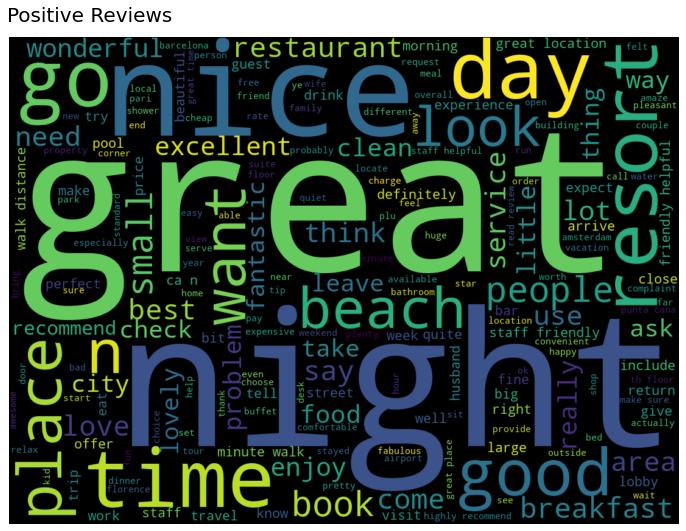

In [68]:
# create figure
fig, ax = plt.subplots(figsize = (12,10))

wordcloud = WordCloud(width=1100, height=800, stopwords=stopwords).generate(pos_Review)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

ax.set_title('Positive Reviews', pad=15, fontsize = 20)
ax.title.set_position([.12, 0])

plt.show()

# Negative Reviews

In [69]:
neg_Review = " ".join(Review for Review in neg.Review_cln)

In [70]:
# sample of text to verify
neg_Review[:2000]

'horrible customer service hotel stay february rd th friend pick hotel monaco appeal website online package include champagne late checkout free valet gift spa weekend friend check room hour earlier come later pull valet young man stand asked valet open say pull bag didn____ offer help get garment bag suitcase come car key room number say valet car park car street pull leave key work ask valet park car get go room fine bottle champagne oil lotion gift spa dress go come get bed notice blood drop pillow sheet pillow disgust unbelievable call desk sent somebody minute later swap sheet leave apologize sunday morning call desk speak management sheet aggravate rude apparently manager kind supervisor weekend wait monday morning young man speak say cover food add person change sheet say fresh blood rude tone checkout pm package book staff maid try walk room open door apologize closing people call say check remind package finally pack thing go downstairs check quickly sign paper take way take c

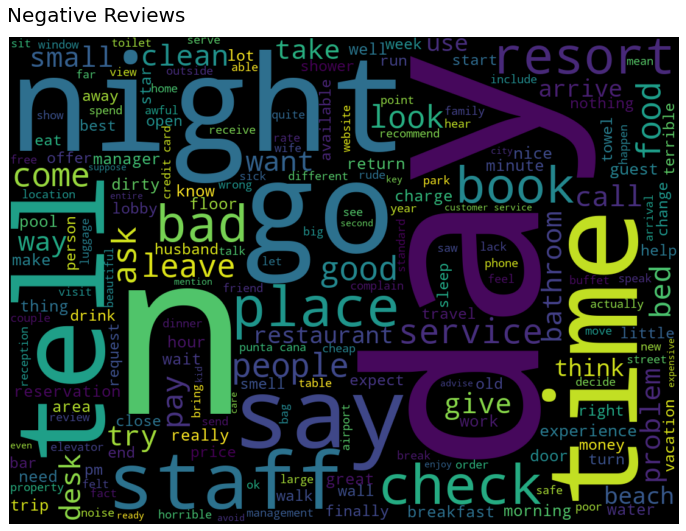

In [71]:
# create figure
fig, ax = plt.subplots(figsize = (12,10))

wordcloud = WordCloud(width=1100, height=800, stopwords=stopwords).generate(neg_Review)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

ax.set_title('Negative Reviews', pad=15, fontsize = 20)
ax.title.set_position([.13, 0])

plt.show()

Words to look at in bi-grams to gain more insight: go, check, one, bad, room

# Term Frequency & Inverse Document Frequency (TF-IDF)

# Positive Reviews TF-IDF

In [72]:
pos_corpus = pos.Review_cln.tolist()

In [73]:
pos_corpus[:10]

['nice hotel expensive parking get good deal stay hotel anniversary arrive late evening take advice previous review valet park check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillow soundproof like heard music room night morning loud bang door open closing hear people talk hallway maybe noisy neighbor aveda bath product nice goldfish stay nice touch take advantage stay long location great walk distance shop overall nice experience pay park night',
 'unique great stay wonderful time hotel monaco location excellent short stroll main downtown shop area pet friendly room show sign animal hair smell monaco suite sleep area big strip curtain pull closed nice touch felt cosy goldfish name brandi enjoy n partake free wine coffee tea service lobby think great feature great staff friendly free wireless internet hotel work suite laptop decor lovely eclectic mix patten color palatte animal print bathrobe feel like rock star nice

In [74]:
# initiate TfidVectorizer
tfIdfVectorizer=TfidfVectorizer(use_idf=True)

# fit the positive documents
tfIdf = tfIdfVectorizer.fit_transform(pos_corpus)

# create dataframe of positive tfidf's
pos_tfidf = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), 
                         columns=["TF-IDF"])

# sort in descending order
pos_tfidf = pos_tfidf.sort_values('TF-IDF', ascending=False)

In [75]:
pos_tfidf.head(25)

,TF-IDF
nice,0.259659
goldfish,0.211276
stiff,0.201280
woke,0.199929
neck,0.195126
closing,0.194051
existent,0.193018
park,0.179414
soundproof,0.175271
aveda,0.170554


# Negative Reviews TF-IDF

In [76]:
neg_corpus = neg.Review_cln.tolist()

In [77]:
neg_corpus[:10]

['horrible customer service hotel stay february rd th friend pick hotel monaco appeal website online package include champagne late checkout free valet gift spa weekend friend check room hour earlier come later pull valet young man stand asked valet open say pull bag didn____ offer help get garment bag suitcase come car key room number say valet car park car street pull leave key work ask valet park car get go room fine bottle champagne oil lotion gift spa dress go come get bed notice blood drop pillow sheet pillow disgust unbelievable call desk sent somebody minute later swap sheet leave apologize sunday morning call desk speak management sheet aggravate rude apparently manager kind supervisor weekend wait monday morning young man speak say cover food add person change sheet say fresh blood rude tone checkout pm package book staff maid try walk room open door apologize closing people call say check remind package finally pack thing go downstairs check quickly sign paper take way take 

In [78]:
# initiate TfidVectorizer
tfIdfVectorizer=TfidfVectorizer(use_idf=True)

# fit the positive documents
tfIdf = tfIdfVectorizer.fit_transform(neg_corpus)

# create dataframe of positive tfidf's
neg_tfidf = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), 
                         columns=["TF-IDF"])

# sort in descending order
neg_tfidf = neg_tfidf.sort_values('TF-IDF', ascending=False)

In [79]:
neg_tfidf.head(25)

,TF-IDF
valet,0.371706
car,0.205206
sheet,0.192908
pull,0.182745
package,0.181760
say,0.166347
monday,0.149243
champagne,0.142799
gift,0.141400
blood,0.138802


# Bag of Words

# Positive Reviews BoW

In [80]:
nltk.download('punkt')

# create corpus of all positive reviews
pos_corpus = " ".join(Review for Review in pos.Review_cln)

# tokenize the words
pos_tokens = word_tokenize(pos_corpus)

# find frequency of each token
fdist = FreqDist(pos_tokens)

fdist.most_common(20)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91733\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('hotel', 38835),
 ('room', 30975),
 ('stay', 19522),
 ('great', 17970),
 ('good', 13202),
 ('staff', 12672),
 ('n', 12323),
 ('night', 9796),
 ('nice', 9451),
 ('time', 9093),
 ('day', 9006),
 ('location', 8787),
 ('clean', 8020),
 ('walk', 7982),
 ('restaurant', 7795),
 ('breakfast', 7788),
 ('beach', 7440),
 ('service', 7415),
 ('place', 6917),
 ('food', 6557)]

In [81]:
# create series of frequency
pos_fdist = pd.Series(dict(fdist))

# sort in descenidng order
pos_fdist.sort_values(ascending=False, inplace=True)

pos_fdist_top = pos_fdist.head(20)

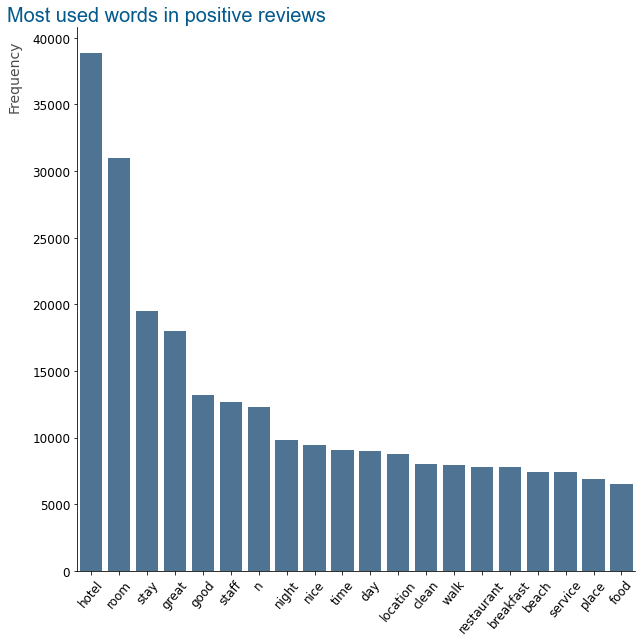

In [82]:
# plot the frequency

font = {'family': 'Arial',
       'color': '#045a8d',
       'size': 20}

fix, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=pos_fdist_top.index, y=pos_fdist_top.values, ax=ax, color = "#44749D")
plt.xticks(rotation=50);

ax.set_title("Most used words in positive reviews", fontdict=font)
ax.set_ylabel('Frequency', fontsize = 14, color='#4c4c4c')

# set axis label positions
ax.yaxis.set_label_coords(-.1,.91)
ax.title.set_position([.16, .8])

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.show()

# Negative Reviews BoW

In [83]:
# create corpus of all positive reviews
neg_corpus = " ".join(Review for Review in neg.Review_cln)

# tokenize the words
neg_tokens = word_tokenize(neg_corpus)

# find frequency of each token
fdist = FreqDist(neg_tokens)

fdist.most_common(20)

[('room', 4162),
 ('hotel', 3857),
 ('stay', 1879),
 ('n', 1631),
 ('day', 1212),
 ('night', 1158),
 ('staff', 965),
 ('time', 903),
 ('service', 891),
 ('go', 891),
 ('say', 847),
 ('get', 780),
 ('tell', 774),
 ('bad', 773),
 ('place', 731),
 ('check', 723),
 ('like', 713),
 ('good', 711),
 ('resort', 704),
 ('bed', 653)]

In [84]:
# create series of frequency
neg_fdist = pd.Series(dict(fdist))

# sort in descenidng order
neg_fdist.sort_values(ascending=False, inplace=True)

neg_fdist_top = neg_fdist.head(20)

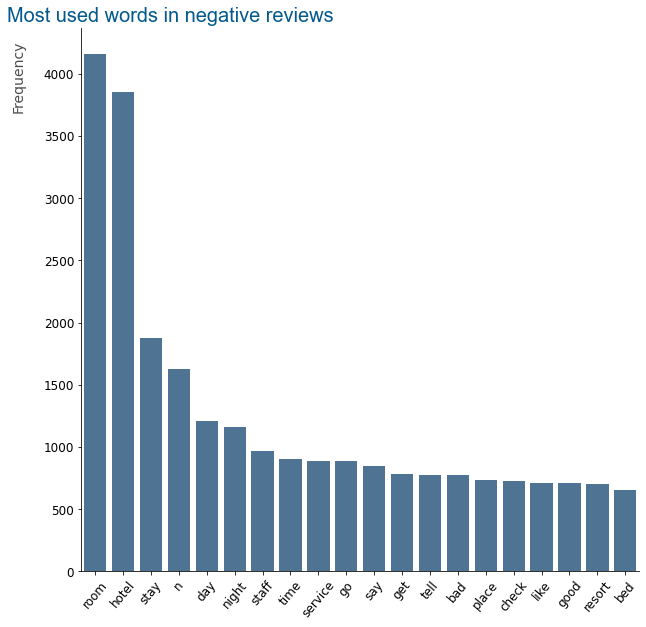

In [85]:
# plot the frequency

font = {'family': 'Arial',
       'color': '#045a8d',
       'size': 20}

fix, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=neg_fdist_top.index, y=neg_fdist_top.values, ax=ax, color = "#44749D")
plt.xticks(rotation=50);

ax.set_title("Most used words in negative reviews", fontdict=font)
ax.set_ylabel('Frequency', fontsize = 14, color='#4c4c4c')

# set axis label positions
ax.yaxis.set_label_coords(-.1,.91)
ax.title.set_position([.16, .8])

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.show()

# Bigrams & Trigrams

# Positive

In [86]:
pos_bigrams = (pd.Series(nltk.ngrams(pos_tokens, 2)).value_counts())[:25]
pos_bigrams

(stay, hotel)          1825
(staff, friendly)      1772
(great, location)      1744
(room, clean)          1544
(minute, walk)         1442
(ca, n)                1402
(hotel, great)         1397
(great, hotel)         1350
(friendly, helpful)    1285
(hotel, stay)          1278
(recommend, hotel)     1269
(walk, distance)       1193
(highly, recommend)    1181
(punta, cana)          1163
(hotel, staff)         1005
(stay, night)          1002
(place, stay)           971
(th, floor)             961
(hotel, room)           959
(room, service)         925
(staff, helpful)        895
(definitely, stay)      783
(great, time)           766
(great, place)          761
(room, small)           727
dtype: int64

In [87]:
pos_trigrams = (pd.Series(nltk.ngrams(pos_tokens, 3)).value_counts())[:25]
pos_trigrams

(staff, friendly, helpful)        696
(hotel, great, location)          487
(room, th, floor)                 347
(highly, recommend, hotel)        324
(flat, screen, tv)                276
(great, place, stay)              258
(old, san, juan)                  247
(king, size, bed)                 244
(ca, n, wait)                     237
(great, hotel, great)             210
(hotel, staff, friendly)          191
(good, value, money)              179
(easy, walk, distance)            177
(staff, helpful, friendly)        169
(la, carte, restaurant)           166
(free, internet, access)          163
(stay, hotel, night)              151
(minute, walk, away)              145
(ca, n, beat)                     144
(hotel, stay, hotel)              141
(hotel, good, location)           140
(definitely, recommend, hotel)    140
(room, good, size)                137
(ca, n, say)                      134
(great, hotel, stay)              134
dtype: int64

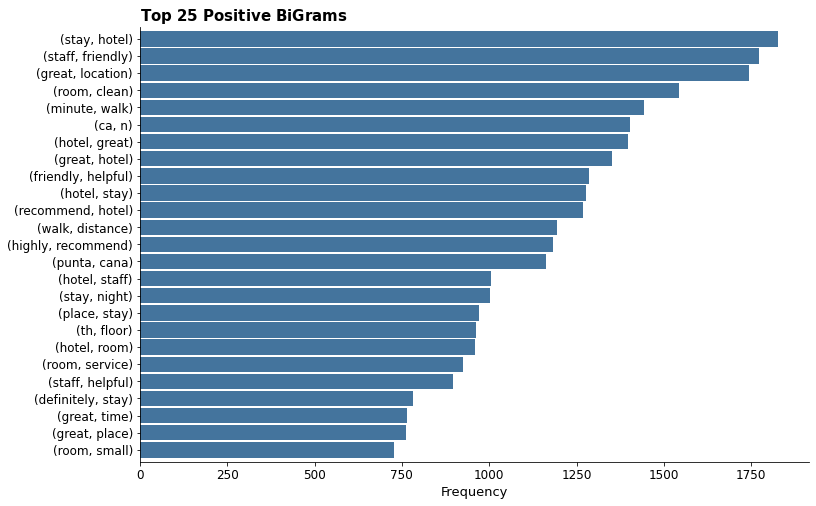

In [88]:
# create figure
fig, ax = plt.subplots(figsize = (12,8))

# width of the bar
width = .85

# create horizontal bar chart


pos_bigrams.sort_values().plot.barh(color='#44749D', width=.9)

# remove x axis ticks
#ax.axes.xaxis.set_ticks([])

# remove vertical grid
ax.xaxis.grid(False)

# remove horizontal grid
ax.yaxis.grid(False)

# set x axis label
ax.set_xlabel('Frequency', fontsize = 13)

# title
ax.set_title('$\\bf{Top\ 25\ Positive\ BiGrams}$', fontsize = 15, loc = 'left')

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.show()

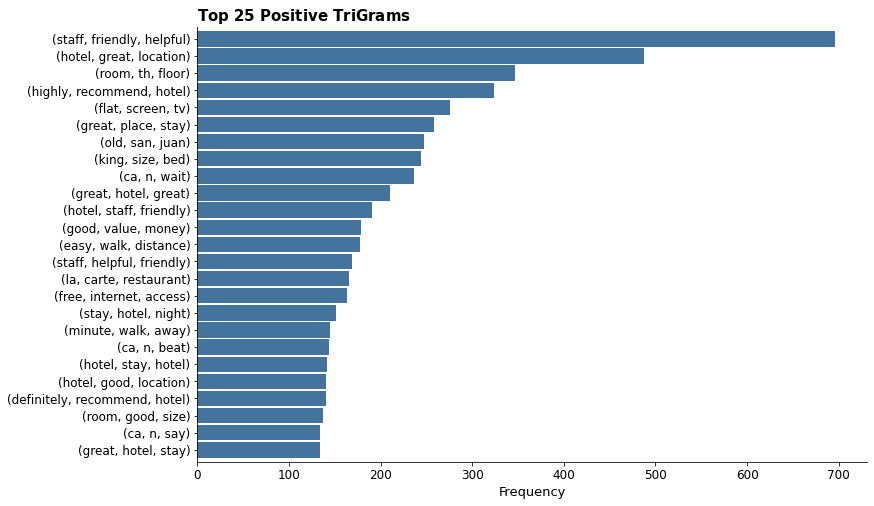

In [89]:
# create figure
fig, ax = plt.subplots(figsize = (12,8))

# width of the bar
width = .85

# create horizontal bar chart


pos_trigrams.sort_values().plot.barh(color='#44749D', width=.9)

# remove x axis ticks
#ax.axes.xaxis.set_ticks([])

# remove vertical grid
ax.xaxis.grid(False)

# remove horizontal grid
ax.yaxis.grid(False)

# set x axis label
ax.set_xlabel('Frequency', fontsize = 13)

# title
ax.set_title('$\\bf{Top\ 25\ Positive\ TriGrams}$', fontsize = 15, loc = 'left')

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.show()

# Negative

In [90]:
neg_bigrams = (pd.Series(nltk.ngrams(neg_tokens, 2)).value_counts())[:25]
neg_bigrams

(stay, hotel)          178
(punta, cana)          146
(star, hotel)          126
(hotel, stay)          122
(credit, card)         122
(hotel, room)          109
(customer, service)    105
(bad, hotel)            96
(room, service)         93
(room, small)           89
(stay, night)           86
(hotel, staff)          84
(n, work)               81
(look, like)            79
(book, hotel)           78
(air, condition)        77
(room, room)            76
(night, stay)           75
(room, clean)           75
(n, stay)               75
(ca, n)                 73
(get, room)             71
(stay, away)            70
(travel, agent)         68
(room, n)               67
dtype: int64

In [91]:
neg_trigrams = (pd.Series(nltk.ngrams(neg_tokens, 3)).value_counts())[:25]
neg_trigrams

(bad, hotel, stay)           31
(bad, hotel, experience)     23
(non, smoking, room)         22
(king, size, bed)            18
(resort, punta, cana)        17
(old, san, juan)             15
(n, waste, money)            15
(charge, credit, card)       14
(year, old, son)             14
(air, condition, work)       14
(melia, caribe, tropical)    12
(holiday, inn, express)      12
(room, double, bed)          11
(bad, experience, hotel)     11
(review, trip, advisor)      11
(good, thing, hotel)         10
(bad, place, stay)           10
(ca, n, believe)             10
(credit, card, detail)       10
(order, room, service)       10
(n, speak, spanish)          10
(finally, get, room)         10
(slide, glass, door)          9
(la, carte, restaurant)       9
(room, smell, like)           9
dtype: int64

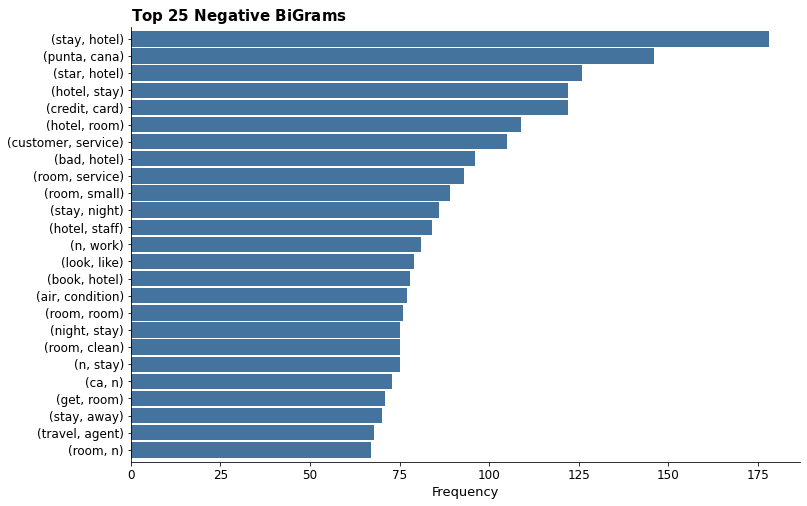

In [92]:
# create figure
fig, ax = plt.subplots(figsize = (12,8))

# width of the bar
width = .85

# create horizontal bar chart


neg_bigrams.sort_values().plot.barh(color='#44749D', width=.9)

# remove x axis ticks
#ax.axes.xaxis.set_ticks([])

# remove vertical grid
ax.xaxis.grid(False)

# remove horizontal grid
ax.yaxis.grid(False)

# set x axis label
ax.set_xlabel('Frequency', fontsize = 13)

# title
ax.set_title('$\\bf{Top\ 25\ Negative\ BiGrams}$', fontsize = 15, loc = 'left')

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.show()

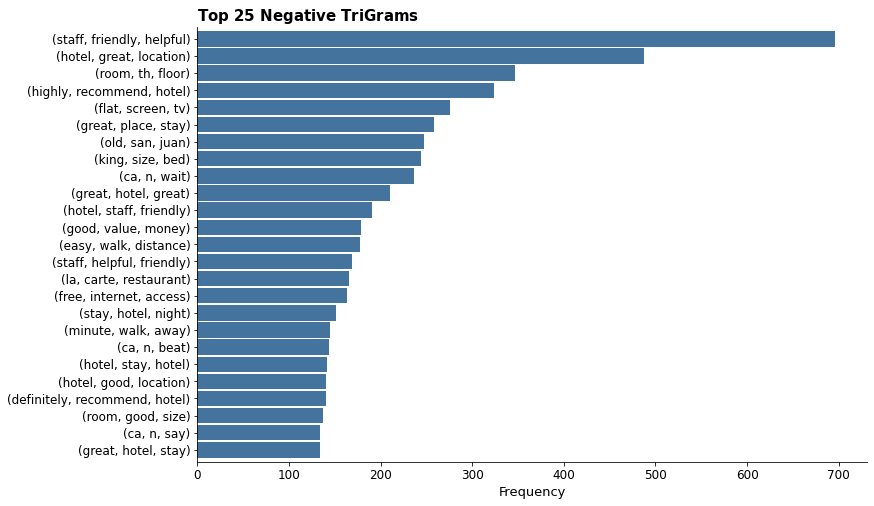

In [93]:
# create figure
fig, ax = plt.subplots(figsize = (12,8))

# width of the bar
width = .85

# create horizontal bar chart


pos_trigrams.sort_values().plot.barh(color='#44749D', width=.9)

# remove x axis ticks
#ax.axes.xaxis.set_ticks([])

# remove vertical grid
ax.xaxis.grid(False)

# remove horizontal grid
ax.yaxis.grid(False)

# set x axis label
ax.set_xlabel('Frequency', fontsize = 13)

# title
ax.set_title('$\\bf{Top\ 25\ Negative\ TriGrams}$', fontsize = 15, loc = 'left')

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.show()

# Model Building and Evaluation

In [94]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus=[]
for i in range(0,19650):
  review=re.sub('[^a-zA-Z]',' ',df['Review'][i])
  review=review.lower()
  review=review.split()
  ps=PorterStemmer()
  all_stopwords=stopwords.words('english')
  all_stopwords.remove('not')
  review=[ps.stem(word) for word in review if not word in set (all_stopwords)]
  review=' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91733\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [95]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=20000)
df = pd.read_csv('hotel_reviews.csv')
X=cv.fit_transform(corpus).toarray()
y=df['Rating']

In [96]:
len(X[0])

20000

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Gaussian Naive Bayes

In [98]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [99]:
y_pred=classifier.predict(X_test)

In [100]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[ 56  48  30  64  41]
 [ 67  54  40 103  79]
 [ 89  61  57 134  83]
 [183 127 208 386 262]
 [304 193 246 532 483]]


0.2636132315521629

# Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [102]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix , accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[ 141   73   14    7    4]
 [  65  130   95   43   10]
 [  19   69  134  161   41]
 [   7   32  109  544  474]
 [   2    7   21  376 1352]]


0.5854961832061069

# K-Nearest Neighbours

In [103]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [104]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix , accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[  82   32   13   44   68]
 [  84   38   22  111   88]
 [  38   17   64  177  128]
 [  32   18   62  527  527]
 [  25   14   30  479 1210]]


0.48880407124681935

# Random forest 

In [105]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [106]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  89   25    9   45   71]
 [  45   49   40  116   93]
 [  22   28   42  187  145]
 [   4   25   37  439  661]
 [   6   15   26  364 1347]]


0.5002544529262086

In [114]:
tokenizer = Tokenizer(num_words=5000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ')
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

NameError: name 'Tokenizer' is not defined

In [110]:
model=Sequential()
embedding_vector_features=40
model_3=Sequential()
model_3.add(Embedding(vocab_size,embedding_vector_features,input_length=100))
model_3.add(Dropout(0.65))
model_3.add(Bidirectional(LSTM(100)))
model_3.add(Dropout(0.65))
model_3.add(Dense(1,activation='sigmoid'))

# Model Compilation
model_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model_3.summary())

NameError: name 'Sequential' is not defined